In [7]:
path = "/users/tomekkoszowski/downloads/"
database = path + "database.sqlite"

In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
con = sqlite3.connect(database)
tables = pd.read_sql_query("""SELECT * 
                            FROM sqlite_master 
                            WHERE type = 'table';""", con)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [17]:
countries = pd.read_sql_query("""SELECT * 
                    FROM Country;""", con)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [21]:
leagues = pd.read_sql_query("""SELECT   c.id,
                                        c.name as country,
                                        l.name as league
                                FROM Country as c
                                INNER JOIN League as l
                                    ON c.id = l.country_id;""", con)
leagues

,id,country,league
0,1,Belgium,Belgium Jupiler League
1,1729,England,England Premier League
2,4769,France,France Ligue 1
3,7809,Germany,Germany 1. Bundesliga
4,10257,Italy,Italy Serie A
5,13274,Netherlands,Netherlands Eredivisie
6,15722,Poland,Poland Ekstraklasa
7,17642,Portugal,Portugal Liga ZON Sagres
8,19694,Scotland,Scotland Premier League
9,21518,Spain,Spain LIGA BBVA


In [37]:
games = pd.read_sql_query("""SELECT c.name as country,
                                    l.name as league,
                                    m.season,
                                    DATE(m.date) as date,
                                    m.stage,
                                    ht.team_long_name as home_team,
                                    at.team_long_name as away_team,
                                    m.home_team_goal,
                                    m.away_team_goal
                            FROM Match as m
                            LEFT JOIN Country as c
                                ON m.country_id = c.id
                            LEFT JOIN League as l
                                ON m.league_id = l.id
                            LEFT JOIN Team as ht
                                ON m.home_team_api_id = ht.team_api_id
                            LEFT JOIN Team as at
                                ON m.away_team_api_id = at.team_api_id
                            WHERE country = 'England'
                              AND season = '2015/2016'
                            ORDER BY m.date;""", con)
games

,country,league,season,date,stage,home_team,away_team,home_team_goal,away_team_goal
0,England,England Premier League,2015/2016,2015-08-08,1,Bournemouth,Aston Villa,0,1
1,England,England Premier League,2015/2016,2015-08-08,1,Chelsea,Swansea City,2,2
2,England,England Premier League,2015/2016,2015-08-08,1,Everton,Watford,2,2
3,England,England Premier League,2015/2016,2015-08-08,1,Leicester City,Sunderland,4,2
4,England,England Premier League,2015/2016,2015-08-08,1,Manchester United,Tottenham Hotspur,1,0
...,...,...,...,...,...,...,...,...,...
375,England,England Premier League,2015/2016,2016-05-15,38,Stoke City,West Ham United,2,1
376,England,England Premier League,2015/2016,2016-05-15,38,Swansea City,Manchester City,1,1
377,England,England Premier League,2015/2016,2016-05-15,38,Watford,Sunderland,2,2
378,England,England Premier League,2015/2016,2016-05-15,38,West Bromwich Albion,Liverpool,1,1


In [60]:
avg_goals = pd.read_sql_query("""SELECT c.name as country,
                                        l.name as league,
                                        m.season,
                                        ROUND(AVG(home_team_goal), 3) as avg_home_goals,
                                        ROUND(AVG(away_team_goal), 3) as avg_away_goals,
                                        ROUND(AVG(home_team_goal+away_team_goal), 3) as avg_overall_goals
                                FROM match as m
                                LEFT JOIN country as c
                                    ON m.country_id = c.id
                                LEFT JOIN league as l
                                    ON m.league_id = l.id
                                WHERE country IN ('England', 'Spain', 'Italy', 'Germany', 'France')
                                GROUP BY 1, 2, 3;""", con)
avg_goals

,country,league,season,avg_home_goals,avg_away_goals,avg_overall_goals
0,England,England Premier League,2008/2009,1.400,1.079,2.479
1,England,England Premier League,2009/2010,1.697,1.074,2.771
2,England,England Premier League,2010/2011,1.624,1.174,2.797
3,England,England Premier League,2011/2012,1.589,1.216,2.805
4,England,England Premier League,2012/2013,1.558,1.239,2.797
5,England,England Premier League,2013/2014,1.574,1.195,2.768
6,England,England Premier League,2014/2015,1.474,1.092,2.566
7,England,England Premier League,2015/2016,1.492,1.208,2.700
8,France,France Ligue 1,2008/2009,1.287,0.971,2.258
9,France,France Ligue 1,2009/2010,1.389,1.021,2.411


<AxesSubplot:title={'center':'Average goals per game in top 5 leagues in Europe'}>

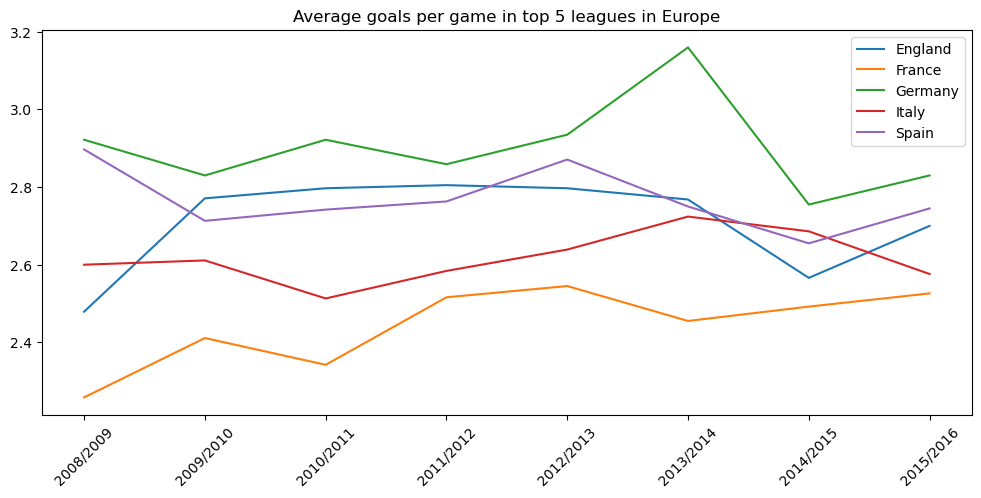

In [69]:
df = pd.DataFrame(index = avg_goals['season'].unique(), columns = avg_goals['country'].unique())
df.loc[:, 'England'] = list(avg_goals.loc[avg_goals['country']=='England', 'avg_overall_goals'])
df.loc[:, 'Spain'] = list(avg_goals.loc[avg_goals['country']=='Spain', 'avg_overall_goals'])
df.loc[:, 'France'] = list(avg_goals.loc[avg_goals['country']=='France', 'avg_overall_goals'])
df.loc[:, 'Germany'] = list(avg_goals.loc[avg_goals['country']=='Germany', 'avg_overall_goals'])
df.loc[:, 'Italy'] = list(avg_goals.loc[avg_goals['country']=='Italy', 'avg_overall_goals'])

df.plot(figsize=(12,5), rot=45, title = 'Average goals per game in top 5 leagues in Europe')